In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
print("Feature names:", data.columns)
print("Class labels:", data['v1'].unique())

Feature names: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
Class labels: ['ham' 'spam']


In [3]:
# Selecting required columns and renaming for convenience
data = data[['v1', 'v2']]
data.columns = ['label', 'message']


In [4]:
# Converting labels to binary (Spam = 1, Ham = 0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Step 2: Text Vectorization
# Tokenizing the text messages
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['message'])
X = tokenizer.texts_to_sequences(data['message'])

# Padding sequences to ensure consistent input length
X = pad_sequences(X, padding='post')

# Labels
y = data['label'].values

In [5]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Input dimensions for the models
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for padding token
input_length = X.shape[1]

# Step 3: Build and Train the RNN Model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=input_length),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8685 - loss: 0.4285 - val_accuracy: 0.8655 - val_loss: 0.3951
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8657 - loss: 0.3954 - val_accuracy: 0.8655 - val_loss: 0.3965
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8657 - loss: 0.3955 - val_accuracy: 0.8655 - val_loss: 0.3959
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8674 - loss: 0.3922 - val_accuracy: 0.8655 - val_loss: 0.3955
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8628 - loss: 0.4019 - val_accuracy: 0.8655 - val_loss: 0.3985


In [11]:
# Step 4: Build and Train the LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=input_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.8179 - loss: 0.4680 - val_accuracy: 0.8655 - val_loss: 0.3959
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.8699 - loss: 0.3891 - val_accuracy: 0.8655 - val_loss: 0.3958
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.8635 - loss: 0.4012 - val_accuracy: 0.8655 - val_loss: 0.3962
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.8636 - loss: 0.4001 - val_accuracy: 0.8655 - val_loss: 0.3953
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.8637 - loss: 0.4003 - val_accuracy: 0.8655 - val_loss: 0.3957


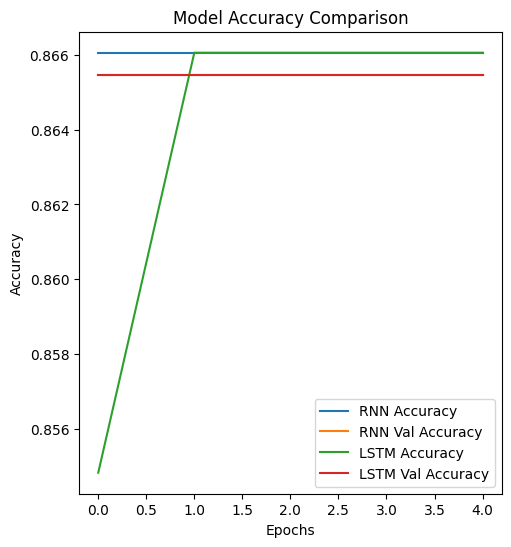

In [12]:
# Step 5: Evaluate and Compare Models
# Plotting accuracy and loss for both models
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='RNN Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Val Accuracy')
plt.plot(history_lstm.history['accuracy'], label='LSTM Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

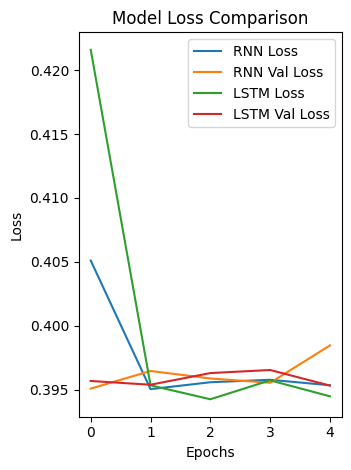

In [9]:
# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='RNN Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
rnn_accuracy = accuracy_score(y_test, (rnn_model.predict(X_test) > 0.5).astype("int32"))
lstm_accuracy = accuracy_score(y_test, (lstm_model.predict(X_test) > 0.5).astype("int32"))

print(f"RNN Model Test Accuracy: {rnn_accuracy:.4f}")
print(f"LSTM Model Test Accuracy: {lstm_accuracy:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
RNN Model Test Accuracy: 0.8655
LSTM Model Test Accuracy: 0.8655
